In [63]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, MaxPool2D,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Veri Yükleme ve Ön İşleme:

In [59]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

# Eğitim verilerini yüklemek ve ön işlemek için ImageDataGenerator sınıfını kullanıyoruz.
#F1./255 ifadesi ile her piksel değerini 255'e bölerek, bu değerleri 0 ile 1 arasında bir aralığa getiririz. 

In [69]:
#Bu işlem, veri normalizasyonu olarak adlandırılır ve modelin daha hızlı ve etkili bir şekilde eğitilmesine yardımcı olur.
egitim = datagen.flow_from_directory(directory='Yeni klasör/',   
    target_size=(128, 128),  # CNN'e girecek görüntülerin boyutu.
    batch_size=16,  # Her adımda işlenecek görüntü sayısı.
    class_mode='binary',  # İki sınıflı (binary) sınıflandırma problemi için.
    subset='training')

Found 22041 images belonging to 2 classes.


In [70]:
# Doğrulama veri seti için aynı işlemler, ancak bu sefer 'veri_seti/dogrulama' klasöründen yükleniyor.
dogrulama = datagen.flow_from_directory(directory="Yeni klasör/",  
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary',
    subset='validation')

Found 5509 images belonging to 2 classes.


### flow_from_directory bu iki klasördeki görüntüleri otomatik olarak algılayacak ve sınıflandıracaktır.

# CNN Modelinin Oluşturulması ve Derlenmesi:

In [71]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 63, 63, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 63, 63, 16)        0         
                                                                 
 conv2d_27 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 30, 30, 32)      

# Modelin Eğitilmesi:

In [75]:
history = model.fit(
    egitim,  # Eğitim veri seti
    epochs=10,  # Eğitim için toplam tekrar sayısı (epoch)
    validation_data=dogrulama,  # Doğrulama veri seti
    verbose=1  # Eğitim sırasında ilerleme bilgilerinin görüntülenme şekli (0: sessiz, 1: ayrıntılı)
)

Epoch 1/10
1378/1378 [==============================] - 147s 106ms/step - loss: 0.4657 - accuracy: 0.7687 - val_loss: 0.2054 - val_accuracy: 0.9303
Epoch 2/10
1378/1378 [==============================] - 143s 104ms/step - loss: 0.1860 - accuracy: 0.9434 - val_loss: 0.1624 - val_accuracy: 0.9455
Epoch 3/10
1378/1378 [==============================] - 143s 104ms/step - loss: 0.1662 - accuracy: 0.9504 - val_loss: 0.1621 - val_accuracy: 0.9434
Epoch 4/10
1378/1378 [==============================] - 166s 120ms/step - loss: 0.1498 - accuracy: 0.9535 - val_loss: 0.1753 - val_accuracy: 0.9330
Epoch 5/10
1378/1378 [==============================] - 186s 135ms/step - loss: 0.1381 - accuracy: 0.9576 - val_loss: 0.1732 - val_accuracy: 0.9365
Epoch 6/10
1378/1378 [==============================] - 176s 127ms/step - loss: 0.1326 - accuracy: 0.9578 - val_loss: 0.1691 - val_accuracy: 0.9392
Epoch 7/10
1378/1378 [==============================] - 160s 116ms/step - loss: 0.1361 - accuracy: 0.9584 - val_

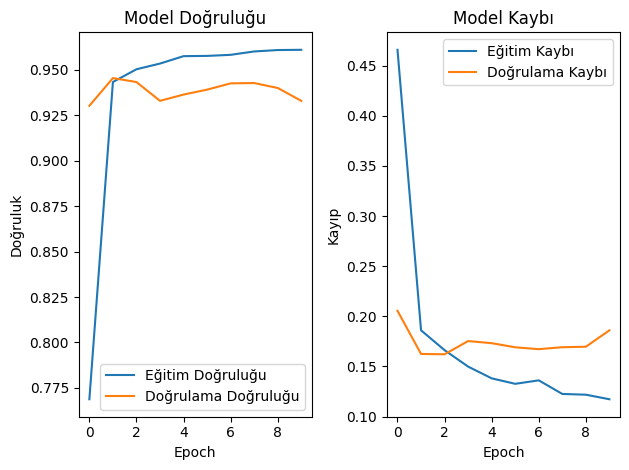

In [79]:
# Doğruluk grafiği
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Model Doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend()

# Kayıp grafiği
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

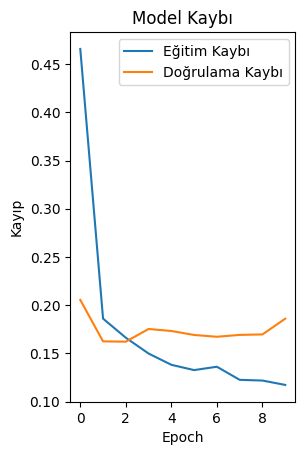